In [6]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 읽기 및 전처리
q_LIWC = pd.read_csv("../../R/data/LIWC_questions.csv")
df_q = pd.read_csv("../../R/data/questions.csv")
df_q = df_q.merge(q_LIWC[['q_Id', 'BigWords']], on='q_Id', how='left')


# 필터링
df_filtered = df_q[(df_q['q_rel_week'] >= -8) & (df_q['q_rel_week'] <= 20)]

In [123]:
model = smf.ols('BigWords ~ C(q_rel_week, Treatment(reference=-8)) * q_treat', data=df_filtered).fit(cov_type='HC1')

In [124]:
coefs = pd.DataFrame({
    'Estimate': model.params,
    'Std. Error': model.bse
})
coefs = coefs[coefs.index.str.contains('q_rel_week')]
coefs = coefs.reset_index()
coefs.columns = ['term', 'Estimate', 'Std. Error']


In [125]:
coefs

,term,Estimate,Std. Error
0,"C(q_rel_week, Treatment(reference=-8))[T.-7]",0.034362,0.075676
1,"C(q_rel_week, Treatment(reference=-8))[T.-6]",0.007989,0.075328
2,"C(q_rel_week, Treatment(reference=-8))[T.-5]",-0.142499,0.076199
3,"C(q_rel_week, Treatment(reference=-8))[T.-4]",-0.082699,0.076250
4,"C(q_rel_week, Treatment(reference=-8))[T.-3]",-0.195548,0.075334
5,"C(q_rel_week, Treatment(reference=-8))[T.-2]",-0.038952,0.075262
6,"C(q_rel_week, Treatment(reference=-8))[T.-1]",0.009776,0.076470
7,"C(q_rel_week, Treatment(reference=-8))[T.0]",-0.119697,0.075729
8,"C(q_rel_week, Treatment(reference=-8))[T.1]",-0.162229,0.075535
9,"C(q_rel_week, Treatment(reference=-8))[T.2]",0.139090,0.076359


In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pickle
import re
from collections import deque
import datetime
from wordcloud import WordCloud
import math
import statsmodels.api as sm
import statsmodels.formula.api as smf

## 1. 파일호출

In [11]:
# 파일 불러오기
with open('../../data/df_wl.pkl', 'rb') as f:
    df_wl = pickle.load(f)


In [12]:
df_wl['creationdate'].min()

Timestamp('2021-10-01 00:00:26.287000')

In [3]:
# df_wl['wl_list'] = df_wl['over4'].apply(lambda x : [len(w) for w in x])

In [13]:
df_wl['wl_6'] = df_wl['over4'].apply(lambda x : [w for w in x if len(w) ==6])
df_wl['over6'] = df_wl['over4'].apply(lambda x : [w for w in x if len(w) >=6])
df_wl['over7'] = df_wl['over4'].apply(lambda x : [w for w in x if len(w) >=7])
df_wl['over8'] = df_wl['over4'].apply(lambda x : [w for w in x if len(w) >=8])


In [192]:
df_wl['wl_6_len'] = df_wl['wl_6'].apply(lambda x : len(x) )
df_wl['wl_over6_len'] = df_wl['over6'].apply(lambda x : len(x) )
df_wl['wl_over7_len'] = df_wl['over7'].apply(lambda x : len(x) )
df_wl['wl_over8_len'] = df_wl['over8'].apply(lambda x : len(x) )

In [194]:
df_wl_bf = df_wl[(df_wl['creationdate']>= '2021-10-01') & (df_wl['creationdate']<= '2022-03-19') ]
df_wl_af = df_wl[(df_wl['creationdate']>= '2022-10-01') & (df_wl['creationdate']<= '2023-03-19') ]

In [195]:
df_wl_bf['q_treat'] =0
df_wl_af['q_treat'] =1

/var/folders/lk/t243gzpx379bzd9mvx8dcsmm0000gp/T/ipykernel_37686/2986870180.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_wl_bf['q_treat'] =0
/var/folders/lk/t243gzpx379bzd9mvx8dcsmm0000gp/T/ipykernel_37686/2986870180.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_wl_af['q_treat'] =1


In [196]:
bf_std_date = datetime.date(2021,11,30)
af_std_date = datetime.date(2022,11,30)

In [197]:
df_wl_bf['c_date'] = pd.to_datetime(df_wl_bf['creationdate']).dt.date
df_wl_af['c_date'] = pd.to_datetime(df_wl_af['creationdate']).dt.date

/var/folders/lk/t243gzpx379bzd9mvx8dcsmm0000gp/T/ipykernel_37686/3016206526.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_wl_bf['c_date'] = pd.to_datetime(df_wl_bf['creationdate']).dt.date
/var/folders/lk/t243gzpx379bzd9mvx8dcsmm0000gp/T/ipykernel_37686/3016206526.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_wl_af['c_date'] = pd.to_datetime(df_wl_af['creationdate']).dt.date


In [198]:
df_wl_bf['diff_day'] = df_wl_bf['c_date'].values - bf_std_date
df_wl_bf['diff_day'] = df_wl_bf['diff_day'].dt.days

df_wl_af['diff_day'] = df_wl_af['c_date'].values - af_std_date
df_wl_af['diff_day'] = df_wl_af['diff_day'].dt.days


/var/folders/lk/t243gzpx379bzd9mvx8dcsmm0000gp/T/ipykernel_37686/3378244647.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_wl_bf['diff_day'] = df_wl_bf['c_date'].values - bf_std_date
/var/folders/lk/t243gzpx379bzd9mvx8dcsmm0000gp/T/ipykernel_37686/3378244647.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_wl_bf['diff_day'] = df_wl_bf['diff_day'].dt.days
/var/folders/lk/t243gzpx379bzd9mvx8dcsmm0000gp/T/ipykernel_37686/3378244647.py:4: SettingWithCopyWarning: 
A value is trying to be set on a c

In [199]:
df_wl_bf['diff_week'] = df_wl_bf['diff_day'].apply(lambda x  : math.ceil(x/7))
df_wl_af['diff_week'] = df_wl_af['diff_day'].apply(lambda x  : math.ceil(x/7))

/var/folders/lk/t243gzpx379bzd9mvx8dcsmm0000gp/T/ipykernel_37686/2778662221.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_wl_bf['diff_week'] = df_wl_bf['diff_day'].apply(lambda x  : math.ceil(x/7))
/var/folders/lk/t243gzpx379bzd9mvx8dcsmm0000gp/T/ipykernel_37686/2778662221.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_wl_af['diff_week'] = df_wl_af['diff_day'].apply(lambda x  : math.ceil(x/7))


In [200]:
print(df_wl_bf['diff_week'].min())
print(df_wl_bf['diff_week'].max())
print(df_wl_af['diff_week'].min())
print(df_wl_af['diff_week'].max())

-8
16
-8
16


In [201]:
df_wl_bf

,id,creationdate,body_prep,over4,wl_6,over6,over7,over8,wl_6_len,wl_over6_len,c_date,diff_day,diff_week,wl_over7_len,wl_over8_len,q_treat
84,71280187,2022-02-26 20:51:33.287,This is what I triedBut it says list indices m...,"[This, what, triedBut, says, list, indices, mu...","[slices, should]","[triedBut, indices, integers, slices, strWhat,...","[triedBut, indices, integers, strWhat]","[triedBut, integers]",2,6,2022-02-26,88,13,4,2,0
85,71281156,2022-02-26 23:55:05.443,Brother I had same problem with my laptopi3 se...,"[Brother, same, problem, with, laptopi3, secon...","[second, active, mostly]","[Brother, problem, laptopi3, second, generatio...","[Brother, problem, laptopi3, generation, repla...","[laptopi3, generation, replaced]",3,9,2022-02-26,88,13,6,3,0
86,71260521,2022-02-25 02:59:20.623,Im pretty new to Haskell and Im trying to filt...,"[pretty, Haskell, trying, filter, list, tuples...","[pretty, trying, filter, tuples, string, filte...","[pretty, Haskell, trying, filter, tuples, cont...","[Haskell, contain, strings, strings, contains,...","[contains, evaluates, filterExampleGiven, tupl...",16,68,2022-02-25,87,13,52,38,0
87,71196829,2022-02-20 17:15:06.873,Say I have a DataFrame like belowHow can I tur...,"[have, DataFrame, like, belowHow, turn, someth...","[domain, column, should]","[DataFrame, belowHow, something, domain, prese...","[DataFrame, belowHow, something, present, exam...","[DataFrame, belowHow, something, togetherThe, ...",3,13,2022-02-20,82,12,10,5,0
88,71193277,2022-02-20 10:03:00.903,If you connect to a database run the query it...,"[connect, database, query, will, return, list,...","[return, tables, refine, search, modify, column]","[connect, database, return, tables, databaseYo...","[connect, database, databaseYou, conditionsYou...","[database, databaseYou, conditionsYou, database]",6,11,2022-02-20,82,12,5,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43417116,69662064,2021-10-21 12:33:41.947,When you iterate over a define list variable y...,"[When, iterate, over, define, list, variable, ...","[define, second]","[iterate, define, variable, encounter, problem...","[iterate, variable, encounter, problems, lookT...","[variable, encounter, problems, automatically,...",2,13,2021-10-21,-40,-5,11,7,0
43417117,69631045,2021-10-19 12:42:31.573,As I see the original complexity on the way to...,"[original, complexity, achieve, goal, isthe, f...","[hidden, loaded, hidden, should, hidden, simpl...","[original, complexity, achieve, hidden, fielda...","[original, complexity, achieve, fieldand, appe...","[original, complexity, fieldand, clicking, sup...",15,61,2021-10-19,-42,-6,46,30,0
43417118,69632380,2021-10-19 14:08:04.637,I am trying to add a map to a key in firestore...,"[trying, firestore, Getting, console, adding, ...","[trying, adding, trying, adding]","[trying, firestore, Getting, console, adding, ...","[firestore, Getting, console, firetsoreI, uplo...","[firestore, firetsoreI, uploading, multiple, i...",4,23,2021-10-19,-42,-6,19,13,0
43417119,69605374,2021-10-17 14:34:07.300,The difficulty of the implementation mainly de...,"[difficulty, implementation, mainly, depends, ...","[mainly, detect, remove, longer]","[difficulty, implementation, mainly, depends, ...","[difficulty, implementation, depends, strategy...","[difficulty, implementation, strategy, impleme...",4,17,2021-10-17,-44,-6,13,11,0


In [202]:
df_wl_cc = pd.concat([df_wl_bf, df_wl_af], axis =0)

In [203]:
df_wl_cc.head()

,id,creationdate,body_prep,over4,wl_6,over6,over7,over8,wl_6_len,wl_over6_len,c_date,diff_day,diff_week,wl_over7_len,wl_over8_len,q_treat
84,71280187,2022-02-26 20:51:33.287,This is what I triedBut it says list indices m...,"[This, what, triedBut, says, list, indices, mu...","[slices, should]","[triedBut, indices, integers, slices, strWhat,...","[triedBut, indices, integers, strWhat]","[triedBut, integers]",2,6,2022-02-26,88,13,4,2,0
85,71281156,2022-02-26 23:55:05.443,Brother I had same problem with my laptopi3 se...,"[Brother, same, problem, with, laptopi3, secon...","[second, active, mostly]","[Brother, problem, laptopi3, second, generatio...","[Brother, problem, laptopi3, generation, repla...","[laptopi3, generation, replaced]",3,9,2022-02-26,88,13,6,3,0
86,71260521,2022-02-25 02:59:20.623,Im pretty new to Haskell and Im trying to filt...,"[pretty, Haskell, trying, filter, list, tuples...","[pretty, trying, filter, tuples, string, filte...","[pretty, Haskell, trying, filter, tuples, cont...","[Haskell, contain, strings, strings, contains,...","[contains, evaluates, filterExampleGiven, tupl...",16,68,2022-02-25,87,13,52,38,0
87,71196829,2022-02-20 17:15:06.873,Say I have a DataFrame like belowHow can I tur...,"[have, DataFrame, like, belowHow, turn, someth...","[domain, column, should]","[DataFrame, belowHow, something, domain, prese...","[DataFrame, belowHow, something, present, exam...","[DataFrame, belowHow, something, togetherThe, ...",3,13,2022-02-20,82,12,10,5,0
88,71193277,2022-02-20 10:03:00.903,If you connect to a database run the query it...,"[connect, database, query, will, return, list,...","[return, tables, refine, search, modify, column]","[connect, database, return, tables, databaseYo...","[connect, database, databaseYou, conditionsYou...","[database, databaseYou, conditionsYou, database]",6,11,2022-02-20,82,12,5,4,0


In [204]:
df_wl_cc['diff_week'].max()

16

In [205]:
df_filtered_chk = df_filtered[['q_Id','BigWords', 'q_treat']]
df_filtered_chk.shape

(1314420, 3)

In [206]:
df_len_chk = pd.merge(df_filtered, df_wl_cc[['id', 'body_prep', 'wl_over6_len', 'diff_week']], left_on='q_Id', right_on = 'id')

In [207]:
print(df_len_chk.loc[df_len_chk['id'].isna(), 'q_CreationDate'].min())
print(df_len_chk.loc[df_len_chk['id'].isna(), 'q_CreationDate'].max())

nan
nan


In [208]:
df_len_chk.loc[df_len_chk['id'].isna(), :]

,q_Id,q_AcceptedAnswerId,q_CreationDate,q_DeletionDate,q_Score,q_ViewCount,q_OwnerUserId,q_LastEditorUserId,q_LastEditDate,q_LastActivityDate,...,linux,next.js,api,visual-studio-code,numpy,BigWords,id,body_prep,wl_over6_len,diff_week


In [209]:
# 여기가 문제임!!
df_len_chk[df_len_chk['q_rel_week']!=df_len_chk['diff_week']]

,q_Id,q_AcceptedAnswerId,q_CreationDate,q_DeletionDate,q_Score,q_ViewCount,q_OwnerUserId,q_LastEditorUserId,q_LastEditDate,q_LastActivityDate,...,linux,next.js,api,visual-studio-code,numpy,BigWords,id,body_prep,wl_over6_len,diff_week
3928,73967417,NaN,2022-10-06T00:00:23Z,NaN,0,90,2476920,NaN,NaN,2022-10-06T02:01:27Z,...,NaN,NaN,NaN,NaN,NaN,25.88,73967417,Im trying to follow this tutorialhttpsjujuisdo...,27,-7
3929,73967418,NaN,2022-10-06T00:00:43Z,NaN,0,91,14650957,14650957.0,2022-10-06T12:24:20Z,2022-10-06T12:24:20Z,...,NaN,NaN,NaN,NaN,NaN,14.77,73967418,is the time complexity of this algorithm n2 as...,10,-7
3930,73967426,NaN,2022-10-06T00:03:59Z,NaN,1,138,16826307,16826307.0,2022-10-06T00:43:30Z,2022-10-06T01:52:16Z,...,NaN,NaN,NaN,NaN,NaN,16.33,73967426,I need it to only print the first capital of e...,12,-7
3931,73967429,73967609.0,2022-10-06T00:04:28Z,NaN,0,158,20171162,NaN,NaN,2022-10-06T09:51:12Z,...,NaN,NaN,NaN,NaN,NaN,12.35,73967429,Im currently trying to write a script so that ...,57,-7
3932,73967431,NaN,2022-10-06T00:04:36Z,NaN,0,94,20171193,20171193.0,2022-10-06T00:07:00Z,2022-10-06T01:07:20Z,...,NaN,NaN,NaN,NaN,NaN,28.21,73967431,I want to be able to only select quotnot creat...,9,-7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1252360,74972560,NaN,2022-12-31T23:50:44Z,NaN,1,405,20022142,NaN,NaN,2022-12-31T23:50:44Z,...,NaN,NaN,NaN,NaN,NaN,17.39,74972560,Im trying to import and delete quotloginquot d...,8,5
1252361,74972561,NaN,2022-12-31T23:51:23Z,NaN,2,43,14745939,1714410.0,2023-01-04T09:24:09Z,2023-01-04T09:24:09Z,...,NaN,NaN,NaN,NaN,NaN,23.32,74972561,Farmland Image w anomalyIn the picture above t...,62,5
1252362,74972567,74972634.0,2022-12-31T23:53:13Z,NaN,0,1465,1152980,NaN,NaN,2023-01-01T00:23:03Z,...,NaN,NaN,NaN,NaN,NaN,27.00,74972567,I literally copied the code from the openAI ex...,19,5
1252363,74972573,74973009.0,2022-12-31T23:57:23Z,NaN,0,35,8684119,13302.0,2023-01-01T08:40:14Z,2023-01-01T08:40:14Z,...,NaN,NaN,NaN,NaN,NaN,27.08,74972573,Is there a way to implement this so that I can...,38,5


In [157]:
df_len_chk.loc[df_len_chk['id'] == 73954723, 'body_prep'].values

array(['Ive got my portfolio site deployed with Netlify On my portfolio I have a link to my resume which takes the user to a pdf version stored in Google Drive Netlify linked to my old resume just fine but I recently updated my resume and so I updated the link in my code My site is built with Create React App and when I run npm start and run it on my local server the new link to my updated resume works But when I open my site on Netlify it still uses the old link even though Ive changed the link in my code and deleted the file from Google Drive Everything is connected okay  the changes from my local repo are pushed to the remote repo which trigger an automatic update on Netlify But despite this Netlify still uses the old linkIve already tried reuploading my site using Netlifys quotclear cache and retry with latest branch commitquot option using a different web browser and using a different device but same problem and nothing has worked yetWhat could be causing this weird behaviorNetlif

In [158]:
df_wl_cc.loc[df_wl_cc['id'] == 73954723, 'over6'].values[0]

['portfolio',
 'deployed',
 'Netlify',
 'portfolio',
 'resume',
 'version',
 'stored',
 'Google',
 'Netlify',
 'linked',
 'resume',
 'recently',
 'updated',
 'resume',
 'updated',
 'Create',
 'server',
 'updated',
 'resume',
 'Netlify',
 'though',
 'changed',
 'deleted',
 'Google',
 'Everything',
 'connected',
 'changes',
 'pushed',
 'remote',
 'trigger',
 'automatic',
 'update',
 'Netlify',
 'despite',
 'Netlify',
 'linkIve',
 'already',
 'reuploading',
 'Netlifys',
 'quotclear',
 'latest',
 'branch',
 'commitquot',
 'option',
 'different',
 'browser',
 'different',
 'device',
 'problem',
 'nothing',
 'worked',
 'yetWhat',
 'causing',
 'behaviorNetlify',
 'showing',
 'updateslink',
 'deleted',
 'resume',
 'Google',
 'DriveCorrect',
 'resume',
 'accessed',
 'localhost']

In [159]:
len(df_wl_cc.loc[df_wl_cc['id'] == 73954723, 'over6'].values[0])

63

In [100]:
df_wl_cc

,id,creationdate,body_prep,over4,wl_6,over6,over7,over8,wl_6_len,wl_over6_len,c_date,diff_day,diff_week,q_treat
84,71280187,2022-02-26 20:51:33.287,This is what I triedBut it says list indices m...,"[This, what, triedBut, says, list, indices, mu...","[slices, should]","[triedBut, indices, integers, slices, strWhat,...","[triedBut, indices, integers, strWhat]","[triedBut, integers]",2,6,2022-02-26,88,13,0
85,71281156,2022-02-26 23:55:05.443,Brother I had same problem with my laptopi3 se...,"[Brother, same, problem, with, laptopi3, secon...","[second, active, mostly]","[Brother, problem, laptopi3, second, generatio...","[Brother, problem, laptopi3, generation, repla...","[laptopi3, generation, replaced]",3,9,2022-02-26,88,13,0
86,71260521,2022-02-25 02:59:20.623,Im pretty new to Haskell and Im trying to filt...,"[pretty, Haskell, trying, filter, list, tuples...","[pretty, trying, filter, tuples, string, filte...","[pretty, Haskell, trying, filter, tuples, cont...","[Haskell, contain, strings, strings, contains,...","[contains, evaluates, filterExampleGiven, tupl...",16,68,2022-02-25,87,13,0
87,71196829,2022-02-20 17:15:06.873,Say I have a DataFrame like belowHow can I tur...,"[have, DataFrame, like, belowHow, turn, someth...","[domain, column, should]","[DataFrame, belowHow, something, domain, prese...","[DataFrame, belowHow, something, present, exam...","[DataFrame, belowHow, something, togetherThe, ...",3,13,2022-02-20,82,12,0
88,71193277,2022-02-20 10:03:00.903,If you connect to a database run the query it...,"[connect, database, query, will, return, list,...","[return, tables, refine, search, modify, column]","[connect, database, return, tables, databaseYo...","[connect, database, databaseYou, conditionsYou...","[database, databaseYou, conditionsYou, database]",6,11,2022-02-20,82,12,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43415849,74403266,2022-11-11 13:30:13.570,i am trying to access variable result from out...,"[trying, access, variable, result, from, outsi...","[trying, access, result, things, global, alway...","[trying, access, variable, result, outside, fu...","[variable, outside, function, several, success...","[variable, function, variable, greatvariable, ...",11,26,2022-11-11,-19,-2,1
43415850,74379596,2022-11-09 18:15:02.463,Use lpadBut first remove comma with blank usin...,"[lpadBut, first, remove, comma, with, blank, u...","[remove, places, with0s]","[lpadBut, remove, replace, places, with0s]","[lpadBut, replace]",[],3,5,2022-11-09,-21,-3,1
43415851,74367214,2022-11-08 21:10:00.263,You can most probably have that in one single ...,"[most, probably, have, that, single, task, hav...","[single, moment, should, happen, eleven, thoug...","[probably, single, dynamicI, suppose, targetin...","[probably, dynamicI, suppose, targeting, twelv...","[probably, dynamicI, targeting, twelveWhat, le...",15,38,2022-11-08,-22,-3,1
43415852,74353132,2022-11-07 21:26:40.963,On my machine same h265 encode works almost tw...,"[machine, same, h265, encode, works, almost, t...","[encode, almost, 64bits, single, higher, unless]","[machine, encode, almost, virtulDubx64, librar...","[machine, virtulDubx64, library, virtulDubx32,...","[virtulDubx64, virtulDubx32, probably, operati...",6,21,2022-11-07,-23,-3,1


In [132]:
df_len_chk['q_treat']

0          1
1          1
2          1
3          1
4          1
          ..
1252360    1
1252361    1
1252362    1
1252363    1
1252364    1
Name: q_treat, Length: 1252365, dtype: int64

In [184]:
model = smf.ols('wl_over6_len ~ C(q_rel_week, Treatment(reference=-8)) * q_treat', data=df_len_chk).fit(cov_type='HC1')

In [185]:
coefs = pd.DataFrame({
    'Estimate': model.params,
    'Std. Error': model.bse
})
coefs = coefs[coefs.index.str.contains('q_rel_week')]
coefs = coefs.reset_index()
coefs.columns = ['term', 'Estimate', 'Std. Error']


In [186]:
coefs

,term,Estimate,Std. Error
0,"C(q_rel_week, Treatment(reference=-8))[T.-7]",0.262994,0.170329
1,"C(q_rel_week, Treatment(reference=-8))[T.-6]",0.053991,0.170602
2,"C(q_rel_week, Treatment(reference=-8))[T.-5]",-0.078221,0.170812
3,"C(q_rel_week, Treatment(reference=-8))[T.-4]",0.273583,0.173579
4,"C(q_rel_week, Treatment(reference=-8))[T.-3]",-0.007925,0.168180
5,"C(q_rel_week, Treatment(reference=-8))[T.-2]",0.047459,0.170558
6,"C(q_rel_week, Treatment(reference=-8))[T.-1]",0.018063,0.174272
7,"C(q_rel_week, Treatment(reference=-8))[T.0]",0.117933,0.172540
8,"C(q_rel_week, Treatment(reference=-8))[T.1]",-0.046798,0.168351
9,"C(q_rel_week, Treatment(reference=-8))[T.2]",0.056250,0.172867


In [187]:
# 예를 들어 'C(q_rel_week, Treatment(reference=-8))[T.-7]:q_treat[T.True]'에서 숫자 부분을 추출
coefs['period'] = coefs['term'].str.extract(r'\[T\.(-?\d+)\]')[0].astype(int)


In [188]:
coefs['ll_95'] = coefs['Estimate'] - 1.965 * coefs['Std. Error']
coefs['ul_95'] = coefs['Estimate'] + 1.965 * coefs['Std. Error']

coefs_ = coefs.iloc[24:, :]

In [189]:
coefs_

,term,Estimate,Std. Error,period,ll_95,ul_95
24,"C(q_rel_week, Treatment(reference=-8))[T.-6]:q...",-0.087192,0.250168,-6,-0.578773,0.404389
25,"C(q_rel_week, Treatment(reference=-8))[T.-5]:q...",1.145994,0.249623,-5,0.655484,1.636503
26,"C(q_rel_week, Treatment(reference=-8))[T.-4]:q...",0.521060,0.249043,-4,0.031690,1.010430
27,"C(q_rel_week, Treatment(reference=-8))[T.-3]:q...",0.923688,0.246608,-3,0.439104,1.408272
28,"C(q_rel_week, Treatment(reference=-8))[T.-2]:q...",0.814287,0.248600,-2,0.325789,1.302786
29,"C(q_rel_week, Treatment(reference=-8))[T.-1]:q...",1.134559,0.253636,-1,0.636165,1.632954
30,"C(q_rel_week, Treatment(reference=-8))[T.0]:q_...",1.427854,0.249686,0,0.937220,1.918487
31,"C(q_rel_week, Treatment(reference=-8))[T.1]:q_...",1.771369,0.246355,1,1.287282,2.255456
32,"C(q_rel_week, Treatment(reference=-8))[T.2]:q_...",1.406789,0.249451,2,0.916617,1.896961
33,"C(q_rel_week, Treatment(reference=-8))[T.3]:q_...",1.648242,0.268908,3,1.119837,2.176647


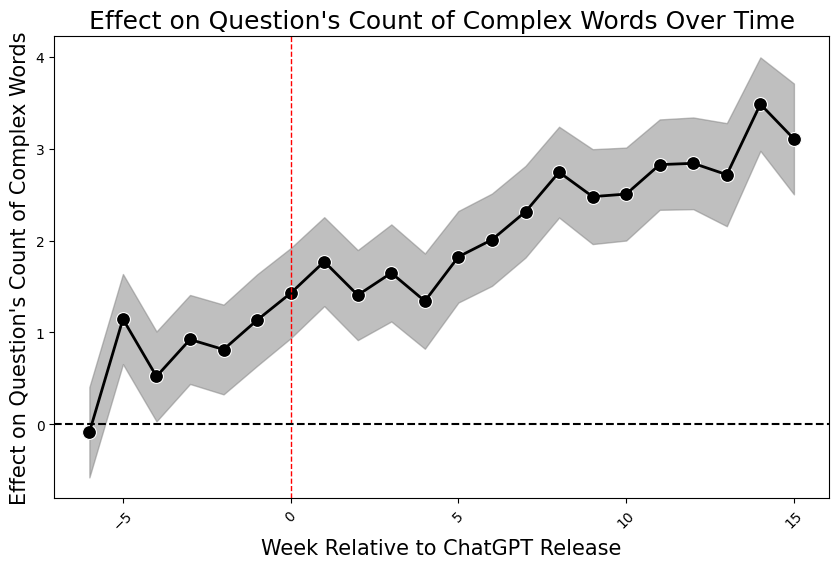

In [191]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='period', y='Estimate', data=coefs_, linewidth=2, color='black')
plt.fill_between(coefs_['period'], coefs_['ll_95'], coefs_['ul_95'], color='gray', alpha=0.5)
sns.scatterplot(x='period', y='Estimate', data=coefs_, s=100, color='black')
plt.axvline(x=0, color='red', linestyle='--', linewidth=1)
plt.axhline(y=0, color='black', linestyle='--')
plt.xlabel("Week Relative to ChatGPT Release", fontsize=15)
plt.ylabel("Effect on Question's Count of Complex Words", fontsize=15)
plt.xticks(rotation=45)
plt.title("Effect on Question's Count of Complex Words Over Time", fontsize=18)
plt.show()


In [21]:
df_wl[df_wl['id'] ==75056565]

,id,creationdate,body_prep,over4,wl_list,wl_6,over6,wl_6_len,wl_over6_len,c_date,diff_day,diff_week,q_treat
19216757,75056565,2022-12-30 11:03:21.790,I want to remove key from dictionary but the o...,"[remove, dictionary, enters, written, gives, E...","[6, 10, 6, 7, 5, 5, 28, 10, 7, 6, 10, 7, 6, 5, 7]","[remove, enters, during, remove]","[remove, dictionary, enters, written, phoneNum...",4,12,2022-12-30,30,5,1


In [22]:
df_wl.loc[df_wl['id'] ==75056565, 'body_prep'].values

array(['I want to remove key from dictionary but the one user enters I have written this code but it gives me this Error for i in phoneNumberskeysRuntimeError dictionary changed size during iterationI know this one is correct but why cant i remove it while Im looping'],
      dtype=object)

In [23]:
df_wl.loc[df_wl['id'] ==75056565, 'over6'].values

array([list(['remove', 'dictionary', 'enters', 'written', 'phoneNumberskeysRuntimeError', 'dictionary', 'changed', 'during', 'iterationI', 'correct', 'remove', 'looping'])],
      dtype=object)

In [24]:
df_wl.tail(20)

,id,creationdate,body_prep,over4,wl_list,wl_6,over6,wl_6_len,wl_over6_len,c_date,diff_day,diff_week,q_treat
43417080,71479052,2022-03-15 08:24:28.767,You could use I slightly modified your code b...,"[could, slightly, modified, below]","[5, 8, 8, 5]",[],"[slightly, modified]",0,2,2022-03-15,-260,-37,0
43417081,71479890,2022-03-15 09:33:49.527,Your loop needs to iterate through all rows Cu...,"[needs, iterate, through, Currently, processes...","[5, 7, 7, 9, 9, 5, 5, 5, 9, 6, 7, 5, 9, 9, 5, 8]",[record],"[iterate, through, Currently, processes, infin...",1,10,2022-03-15,-260,-37,0
43417082,71446603,2022-03-12 02:54:06.933,Theres a good inheritance vs composition tutor...,"[Theres, inheritance, composition, tutorial, h...","[6, 11, 11, 8, 46, 5, 5, 7, 9, 5, 8, 10, 14, 1...","[Theres, paying, paying, within, record, assig...","[Theres, inheritance, composition, tutorial, h...",10,51,2022-03-12,-263,-37,0
43417083,71118517,2022-02-14 21:30:10.590,Is there a way to route the messagesservicebou...,"[there, route, messagesserviceboundfeedback, s...","[5, 5, 28, 7, 5, 5]",[],"[messagesserviceboundfeedback, service]",0,2,2022-02-14,-289,-41,0
43417084,71093142,2022-02-12 15:17:49.450,First I downloaded docker for windows 10 OS Bu...,"[First, downloaded, docker, windows, Built, 19...","[5, 10, 6, 7, 5, 5, 7, 5, 8, 6, 9, 5, 6, 7, 8,...","[docker, docker, docker, during, system, canno...","[downloaded, docker, windows, version, videobu...",9,34,2022-02-12,-291,-41,0
43417085,71088913,2022-02-12 04:04:40.343,Try to add your user to nginx group like,"[nginx, group]","[5, 5]",[],[],0,0,2022-02-12,-291,-41,0
43417086,71078390,2022-02-11 10:15:22.583,Im trying to deploy a Flask app in a container...,"[trying, deploy, Flask, container, MongoDB, in...","[6, 6, 5, 9, 7, 8, 5, 9, 6, 7, 10, 16, 10, 7, ...","[trying, deploy, having, lineAs, docker, figur...","[trying, deploy, container, MongoDB, instance,...",9,43,2022-02-11,-292,-41,0
43417087,71079246,2022-02-11 11:18:11.177,I have a singlecell RNAseq dataset It is a mat...,"[singlecell, RNAseq, dataset, matrix, 30561, g...","[10, 6, 7, 6, 5, 5, 5, 6, 6, 5, 8, 7, 5, 8, 6,...","[RNAseq, matrix, cellsI, subset, gt1000, repea...","[singlecell, RNAseq, dataset, matrix, cellsI, ...",9,42,2022-02-11,-292,-41,0
43417088,71054449,2022-02-09 17:56:27.370,this is a ionic angular project that im workin...,"[ionic, angular, project, working, using, ngla...","[5, 7, 7, 7, 5, 15, 6, 5, 9, 7, 6]","[plugin, errors]","[angular, project, working, nglazyloadimage, p...",2,8,2022-02-09,-294,-42,0
43417089,71043076,2022-02-09 01:52:00.010,With Kotlin DSL example you can add in your ta...,"[Kotlin, example, tasks, following, snippetwhe...","[6, 7, 5, 9, 12, 15, 5, 9, 17]",[Kotlin],"[Kotlin, example, following, snippetwhere, roo...",1,7,2022-02-09,-294,-42,0


In [193]:
model = smf.ols('wl_over7_len ~ C(q_rel_week, Treatment(reference=-8)) * q_treat', data=df_len_chk).fit(cov_type='HC1')

PatsyError: Error evaluating factor: NameError: name 'wl_over7_len' is not defined
    wl_over7_len ~ C(q_rel_week, Treatment(reference=-8)) * q_treat
    ^^^^^^^^^^^^

In [ ]:
coefs = pd.DataFrame({
    'Estimate': model.params,
    'Std. Error': model.bse
})
coefs = coefs[coefs.index.str.contains('q_rel_week')]
coefs = coefs.reset_index()
coefs.columns = ['term', 'Estimate', 'Std. Error']


In [ ]:
coefs

,term,Estimate,Std. Error
0,"C(q_rel_week, Treatment(reference=-8))[T.-7]",0.262994,0.170329
1,"C(q_rel_week, Treatment(reference=-8))[T.-6]",0.053991,0.170602
2,"C(q_rel_week, Treatment(reference=-8))[T.-5]",-0.078221,0.170812
3,"C(q_rel_week, Treatment(reference=-8))[T.-4]",0.273583,0.173579
4,"C(q_rel_week, Treatment(reference=-8))[T.-3]",-0.007925,0.168180
5,"C(q_rel_week, Treatment(reference=-8))[T.-2]",0.047459,0.170558
6,"C(q_rel_week, Treatment(reference=-8))[T.-1]",0.018063,0.174272
7,"C(q_rel_week, Treatment(reference=-8))[T.0]",0.117933,0.172540
8,"C(q_rel_week, Treatment(reference=-8))[T.1]",-0.046798,0.168351
9,"C(q_rel_week, Treatment(reference=-8))[T.2]",0.056250,0.172867


In [ ]:
# 예를 들어 'C(q_rel_week, Treatment(reference=-8))[T.-7]:q_treat[T.True]'에서 숫자 부분을 추출
coefs['period'] = coefs['term'].str.extract(r'\[T\.(-?\d+)\]')[0].astype(int)


In [ ]:
coefs['ll_95'] = coefs['Estimate'] - 1.965 * coefs['Std. Error']
coefs['ul_95'] = coefs['Estimate'] + 1.965 * coefs['Std. Error']

coefs_ = coefs.iloc[24:, :]

In [ ]:
coefs_

,term,Estimate,Std. Error,period,ll_95,ul_95
24,"C(q_rel_week, Treatment(reference=-8))[T.-6]:q...",-0.087192,0.250168,-6,-0.578773,0.404389
25,"C(q_rel_week, Treatment(reference=-8))[T.-5]:q...",1.145994,0.249623,-5,0.655484,1.636503
26,"C(q_rel_week, Treatment(reference=-8))[T.-4]:q...",0.521060,0.249043,-4,0.031690,1.010430
27,"C(q_rel_week, Treatment(reference=-8))[T.-3]:q...",0.923688,0.246608,-3,0.439104,1.408272
28,"C(q_rel_week, Treatment(reference=-8))[T.-2]:q...",0.814287,0.248600,-2,0.325789,1.302786
29,"C(q_rel_week, Treatment(reference=-8))[T.-1]:q...",1.134559,0.253636,-1,0.636165,1.632954
30,"C(q_rel_week, Treatment(reference=-8))[T.0]:q_...",1.427854,0.249686,0,0.937220,1.918487
31,"C(q_rel_week, Treatment(reference=-8))[T.1]:q_...",1.771369,0.246355,1,1.287282,2.255456
32,"C(q_rel_week, Treatment(reference=-8))[T.2]:q_...",1.406789,0.249451,2,0.916617,1.896961
33,"C(q_rel_week, Treatment(reference=-8))[T.3]:q_...",1.648242,0.268908,3,1.119837,2.176647


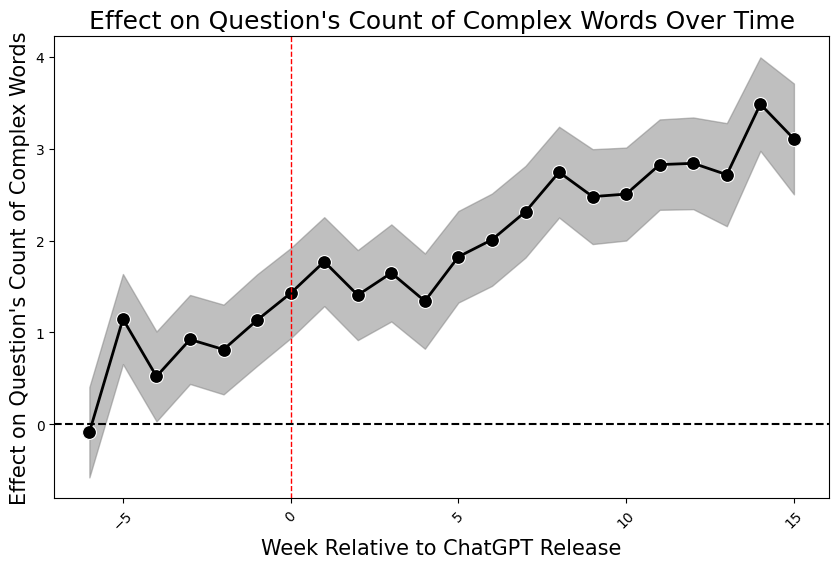

In [ ]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='period', y='Estimate', data=coefs_, linewidth=2, color='black')
plt.fill_between(coefs_['period'], coefs_['ll_95'], coefs_['ul_95'], color='gray', alpha=0.5)
sns.scatterplot(x='period', y='Estimate', data=coefs_, s=100, color='black')
plt.axvline(x=0, color='red', linestyle='--', linewidth=1)
plt.axhline(y=0, color='black', linestyle='--')
plt.xlabel("Week Relative to ChatGPT Release", fontsize=15)
plt.ylabel("Effect on Question's Count of Complex Words", fontsize=15)
plt.xticks(rotation=45)
plt.title("Effect on Question's Count of Complex Words Over Time", fontsize=18)
plt.show()
